In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

sys.path.append('../')

from circularcoordinates import CircCoordLn, weight_ft_0, weight_ft_with_degree_meta, weighted_circular_coordinate
from dataset import torus

In [2]:
_ = torus()
data, coord = [_[el] for el in ['data', 'coord']]
prime = 47

In [3]:
fts = [None] + [
    weight_ft_with_degree_meta(ft)
    for ft in [
        lambda x, y: 1 / (np.sqrt(x * y)),
        lambda x, y: 1 / (x + y)
               ]
] + [weight_ft_0(2)]
results = [[
    weighted_circular_coordinate(data, prime=prime, cocycle_n=0, weight_ft=ft),
    weighted_circular_coordinate(data, prime=prime, cocycle_n=1, weight_ft=ft),
] for ft in tqdm(fts)]
labels = ['Original', '1/sqrt(D0 D1)', '1/(D0 + D1)', 'WDGL']

 75%|███████▌  | 3/4 [00:06<00:02,  2.18s/it]

0.2863958204377603


100%|██████████| 4/4 [00:08<00:00,  2.22s/it]


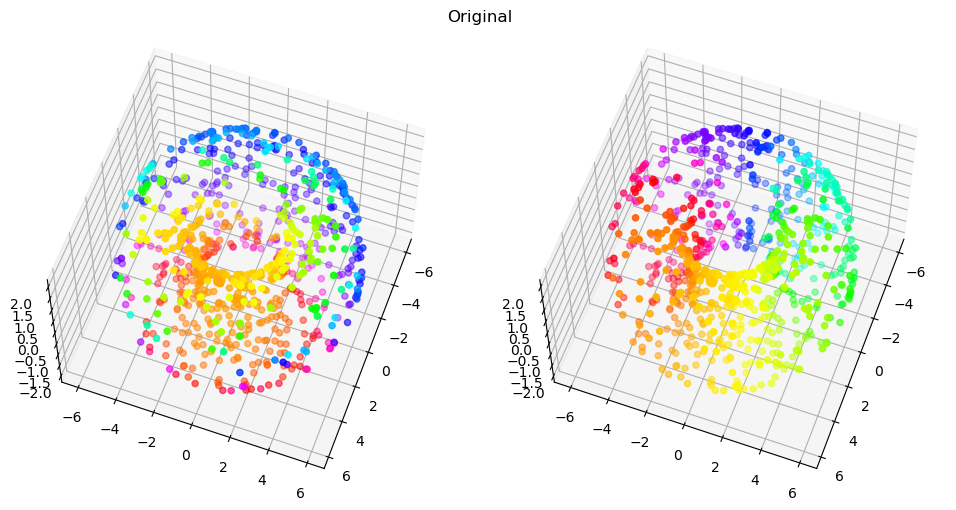

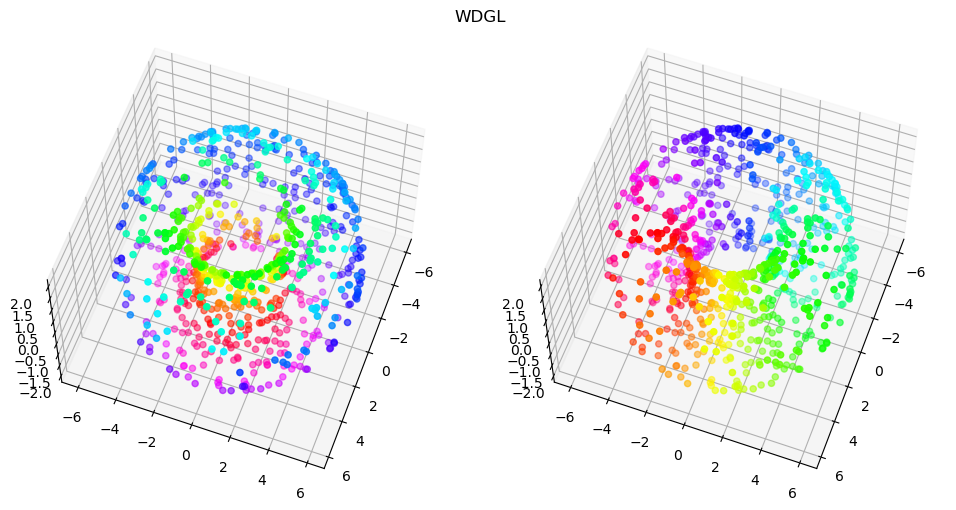

In [4]:
for i in [0, -1]:
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.scatter(*data.T, c=results[i][1], cmap='hsv')
    ax.view_init(elev=60, azim=20)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter(*data.T, c=results[i][0], cmap='hsv')
    plt.suptitle(labels[i])
    ax.view_init(elev=60, azim=20)
    plt.tight_layout()
    plt.show()
    plt.close()

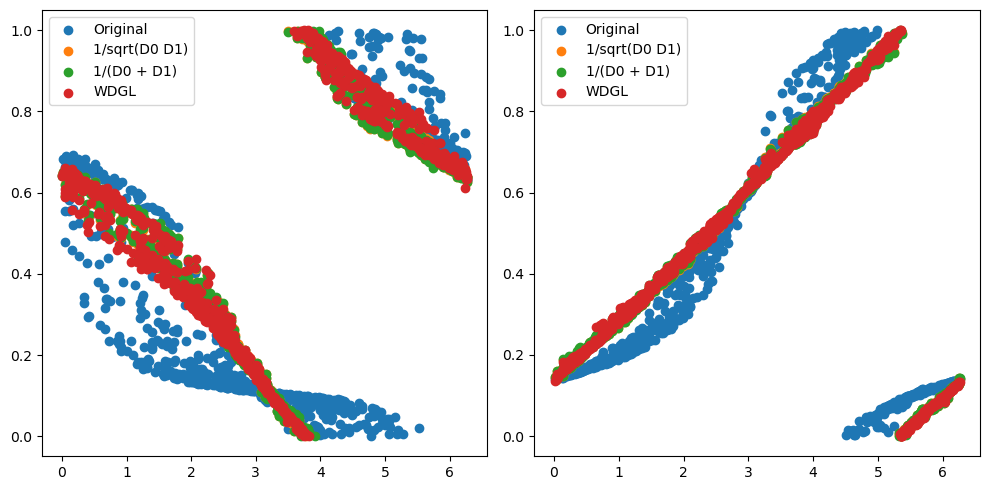

In [5]:
fig, axs = plt.subplots(1,2,figsize=(10, 5))
for result, label in zip(results, labels):
    axs[0].scatter(coord[:, 0], result[1], label=label)
axs[0].legend()
for result, label in zip(results, labels):
    axs[1].scatter(coord[:, 1], result[0], label=label)
axs[1].legend()
plt.tight_layout()
plt.show()
plt.close()

In [6]:
hyper_params = [
    {'epoch': 100, 'lr': 0.001, 'p_norm': 2},
    {'epoch': 3000, 'lr': 0.05, 'p_norm': 4},
    {'epoch': 3000, 'lr': 0.05, 'p_norm': 6},
    {'epoch': 3000, 'lr': 0.05, 'p_norm': 10},
    {'epoch': 5000, 'lr': 0.05, 'p_norm': 20},
]
ccl = CircCoordLn(data, prime=prime)
ccl.setup(0)
orig_1 = ccl.cc_original()
ccl.f_reset_L2()
lp_results_0 = []
for param in hyper_params:
    lp_results_0.append(np.mod(ccl.cc_Lp(**param, delta_thr=1e-7, max_count=500)[0], 1.0))
lp_results_0.append(np.mod(ccl.cc_Linf_Lp(10000, 0.0001, 0.001, 20, 25)[0], 1.0))
lp_results_0 = np.asarray(lp_results_0)

ccl.setup(1)
orig_2 = ccl.cc_original()
ccl.f_reset_L2()
lp_results_1 = []
for param in hyper_params:
    lp_results_1.append(np.mod(ccl.cc_Lp(**param, delta_thr=1e-7, max_count=500)[0], 1.0))
lp_results_1.append(np.mod(ccl.cc_Linf_Lp(10000, 0.0001, 0.001, 20, 25)[0], 1.0))
lp_results_1 = np.asarray(lp_results_1)
lp_results = np.stack([lp_results_0, lp_results_1])

100%|██████████| 10000/10000 [01:05<00:00, 152.56it/s, 0.16684 / 0.16684 / p = infty]        


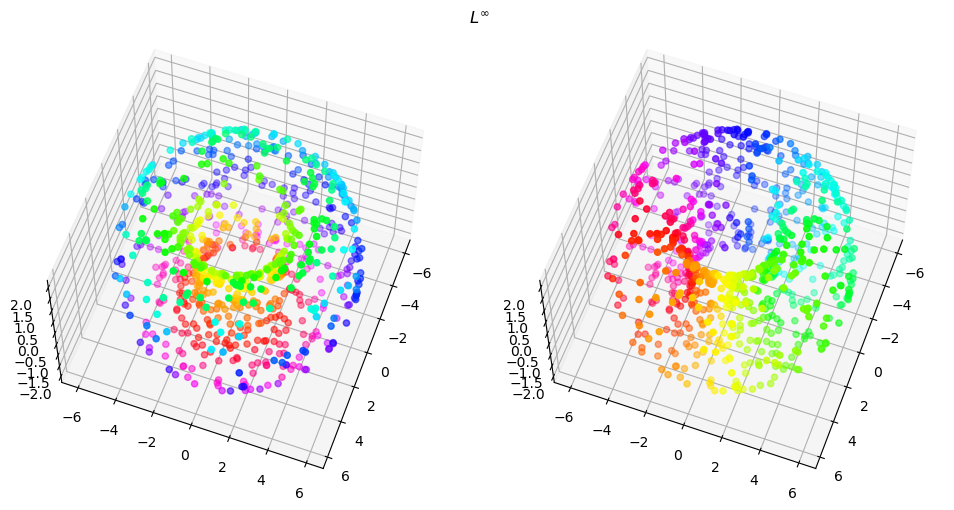

In [7]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(*data.T, c=lp_results[1][-1], cmap='hsv')
ax.view_init(elev=60, azim=20)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(*data.T, c=lp_results[0][-1], cmap='hsv')
plt.suptitle('$L^\infty$')
ax.view_init(elev=60, azim=20)
plt.tight_layout()
plt.show()
plt.close()

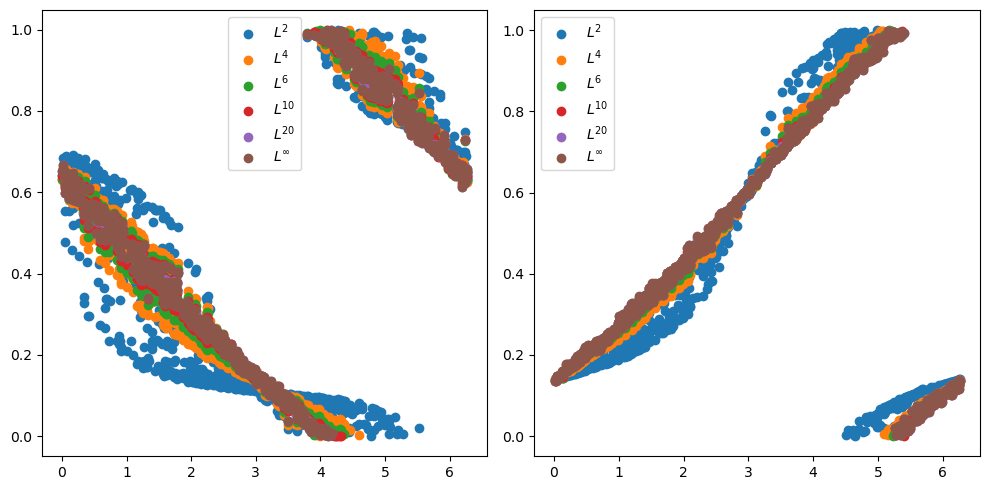

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for result, label in zip(lp_results[1], [2, 4, 6, '{10}', '{20}', '\infty']):
    axs[0].scatter(coord[:, 0], result, label=f'$L^{label}$')
for result, label in zip(lp_results[0], [2, 4, 6, '{10}', '{20}', '\infty']):
    axs[1].scatter(coord[:, 1], result, label=f'$L^{label}$')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()
plt.close()

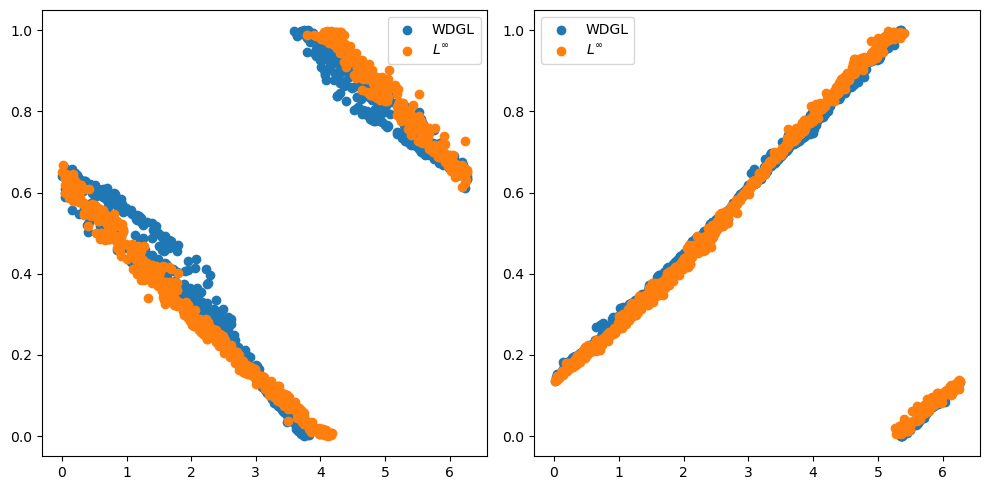

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(coord[:, 0], results[-1][1], label=labels[-1])
axs[0].scatter(coord[:, 0], lp_results[1][-1], label="$L^\infty$")
axs[1].scatter(coord[:, 1], results[-1][0], label=labels[-1])
axs[1].scatter(coord[:, 1], lp_results[0][-1], label="$L^\infty$")
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()
plt.close()